![Laclo](https://drive.google.com/uc?id=1d2dvJclPGX8fC3xQy6neJH7vn-UYZl0U)
# Introducción a Network Science usando Google Colaboratory y NetworkX

Jorge Lopez-Vargas / jalopez2@utpl.edu.ec / @jorgaf

## Introducción

Las redes están por todas partes y casi todo se puede representar como una red.

Indudablemente, existe la tendencia de asociar a las redes con las redes sociales en línea, tales como Twitter o Facebook, pero el concepto de red se remonta mucho antes. Se habla del uso de las redes por parte de Euler para resolver el problema de los [Puentes de Königsberg](https://es.wikipedia.org/wiki/Problema_de_los_puentes_de_Königsberg).

Recién el estudio de las redes sociales se inicia en el año 1933 con los trabajos publicados por Jacob Moreno y en 1967 se hizo posiblemente el experimento más conocido, de la mano de Stanley Milgram, denominado [Mundo pequeño](https://en.wikipedia.org/wiki/Small-world_experiment) (small world) que luego pasó a conocerse como los 6 grados de separación, según el cual dos personas completamente desconocidas, inclusive, viviendo en sitios completamente alejados, están unidos entre sí por 6 personas. Este expermento se repitió en 1997 usando correo electrónico y los resultados fueron casi los mismos.

Para su estudio se han desarrollado varios modelos, como el propuesto por [Erdös y Rényi](https://en.wikipedia.org/wiki/Erdős–Rényi_model) o el modelo Barabási-Albert de conexión preferencial, este último con mayor precisión a la hora de generar redes como las que se encuentran en el mundo real.

Las redes son la base para algunos algoritmos famosos, como el utilizado por google para mostrar los resultados de las búsquedas,denominado [PageRank](https://es.wikipedia.org/wiki/PageRank) en donde se deja de lado el conteo de palabras por un medida que se basa en las conexiones entre sitios Web.

Las redes son un forma general de modelar y estudiar sitemas complejos con muchos elementos que interactúan. Permiten representar diferentes tipos de objetos desde personas hasta páginas Web, desde proteínas a especies, desde routers de Internet a aeropuertos y sus interacciones, desde la físicas a las virtuales, de las químicas a las sociales.

## Elementos básicos

**Red o grafo**: es un conjunto de elementos llamadods *nodos* y otro conjunto de conexiones entre pares de nodos, que se denominan *enlaces*.
La representación gráfica es la siguiente:
![Red](https://drive.google.com/uc?id=1_flvF_1QFeNcKg7DYtI1vvDn2k8WouN1)

Existen redes dirigidas y no dirigidas (llamadas también digrafos). En una red dirigida a los enlaces se los denomina enlaces dirigidos y la punta de flecha señala la dirección, es decir existe un nodo origen y otro destino.

En una red no dirigida todos los enlaces son bidireccionales y no existe el concepto de nodo origen ni destino.


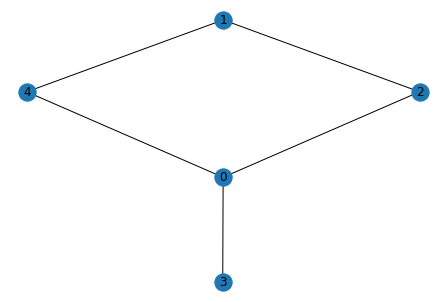

In [22]:
#@title
unDirectedGraph = nx.erdos_renyi_graph(5, 0.35, directed=False)
nx.draw(unDirectedGraph, with_labels=True)

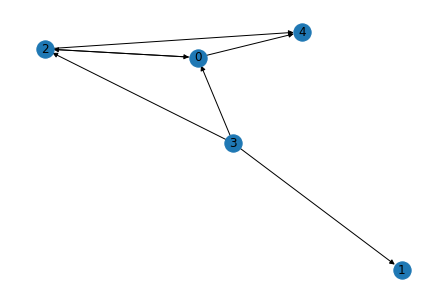

In [24]:
#@title
directedGraph = nx.erdos_renyi_graph(5, 0.3, directed=True)
nx.draw(directedGraph, with_labels=True)

También se puede clasificar a las redes en poderadas o no ponderadas(weighted or unweighted) dependiendo si sus enlaces tienen pesos asociados. El peso es un propiedad que puede señalar la intensidad de la relación.


### Redes en NetworkX

In [ ]:
!pip list

In [1]:
import networkx as nx
%matplotlib inline

In [11]:
nx.__version__

'2.5'

In [2]:
# Red no dirigida
G = nx.Graph() 

In [19]:
print("¿Es una red dirigida?", G.is_directed())

¿Es una red dirigida? False


In [18]:
print("Número nodos (N): ", G.number_of_nodes())
print("Número enlaces (L): ", G.number_of_edges())

Número nodos:  0
Número enlaces:  0


**Nodos**

Dentro de una red un nodo se representa como un punto o como un círculo. Conceptualmente puede ser cualquier entidad del problema que se está representando, entonces un nodo puede ser: personas si se trata de una red social.

Un nodo puede tener muchas propiedades, pero la primera que se necesita es un identificador.

El número de nodos se representa por N y se dice que es el tamaño de la red

### Nodos en NetworkX

In [3]:
G.add_node('a')

In [4]:
# Agregar usando una secuencia
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from( nodes_to_add )

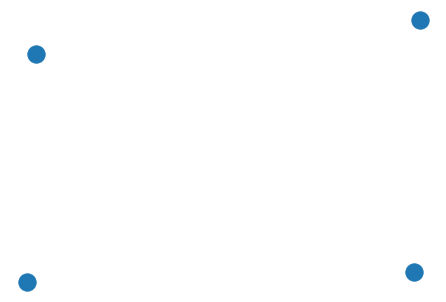

In [5]:
# Visualizar la red
nx.draw(G)

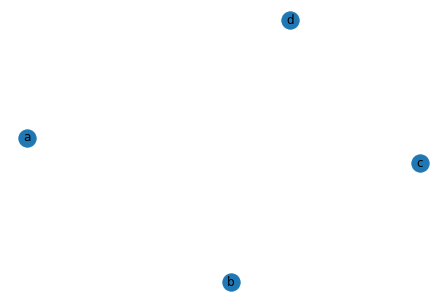

In [6]:
# Visualizar la red y cada nodo con etiqueta
nx.draw ( G, with_labels=True )

**Enlaces**
Se representa como las líneas que unen a dos nodos y señalan la existencia de una relación entre ambas entidades.

Al igual que los nodos, un enlace puede tener muchas propiedades, pero la más conocida es el peso, que como ya se dijo, señala la intensidad de la relación.

Un enlace puede tener dirección, que señala el orden de la relación, es decir permite clasificar en nodo origen (desde donde sale la relación) y nodo destino, en donde llega la flecha.

En número de enlaces se conoce representa como L

### Enlaces en NetworkX

In [8]:
# Agregar un enlace entre a y b
G.add_edge( 'a', 'b')

In [9]:
# Agregar una secuencia de enlaces
edges_to_add = [( 'a', 'c'), ( 'b', 'c' ), ( 'c', 'd' )]
G.add_edges_from( edges_to_add )

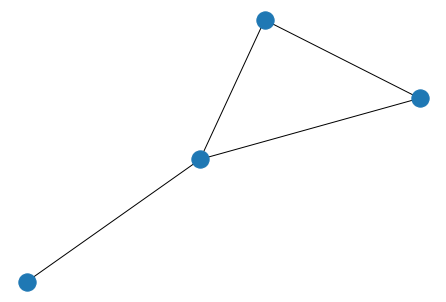

In [10]:
# Visualizar la red
nx.draw( G )

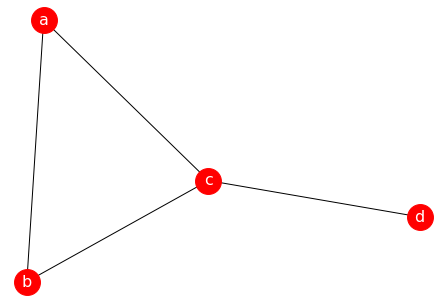

In [22]:
# Visualizar la red con ciertas propiedades
nx.draw( G,
        with_labels=True,
        node_color = 'red',
        node_size= 670,
        font_color = 'white',
        font_size=16)

### Métodos de una red

In [ ]:
# Listar todos los nodos
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [ ]:
# Listar todos los enlaces
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [11]:
# Los objetos NodeView y EdgeView tienen iterators, así que se los puede utilizar en ciclos repetitivos
for node in G.nodes:
  print( node )

a
b
c
d


In [ ]:
for edge in G.edges:
  print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [ ]:
# Obtener el valor de N
G.number_of_nodes()

4

In [ ]:
# Obtener el valor de L
G.number_of_edges()

4

In [ ]:
# Listar los vecinos del nodo b
G.neighbors( 'b' )

In [ ]:
# Por desempeño, muchos métodos de la clase graph devuelven iterators en lugar de listas. Los cuales son convenientes para 
for neighbor in G.neighbors( 'b' ):
  print(neighbor)

a
c


In [ ]:
# Tambien se puede usar el constructor de una lista para convertir el iterator a una lista
list(G.neighbors('b'))

['a', 'c']

In [ ]:
G.has_node('a')

True

In [ ]:
G.has_node('x')

False

In [ ]:
'd' in G.nodes

True

In [ ]:
G.has_edge('a', 'b')

True

In [ ]:
G.has_edge('a', 'd')

False

In [ ]:
('c', 'd') in G.edges

True

### Métodos de NetworkX

In [ ]:
nx.is_tree(G)

False

In [ ]:
nx.is_connected(G)

True

## Grado de un nodo

Una de las primeras que se hace cuando se trabaja con redes es con cuántos nodos se conecta cada uno de los nodos que forman la red.

Esa medida se conoce como grado y se puede usar como una aproximación para medir, por ejemplo la popularidad de un nodo. Entre más conexiones tiene un nodo, mayor será su grado y mayor será su popularidad.



In [ ]:
#Usando el método neighbors
len(list(G.neighbors('a')))

2

In [ ]:
# Pero como es una actividad bastante común NetworkX provee a la clase Graph de un método que hace ese trabajo de una manera más clara
G.degree('a')

2

In [ ]:
def get_leaves(G):
  return [ node for node in G.nodes() if G.degree(node) == 1 ]


In [ ]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

In [ ]:
print(get_leaves(G))

['b', 'c']


In [ ]:
assert set(get_leaves(G)) == {'b', 'c'}

## Redes dirigidas

In [23]:
D = nx.DiGraph()

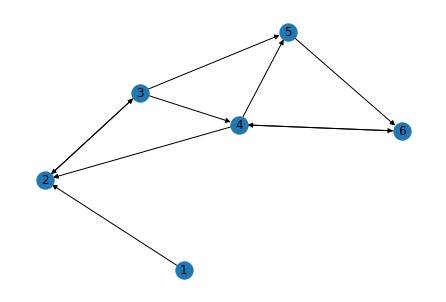

In [25]:
D.add_edges_from([(1, 2), (2, 3), (3, 2), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (6, 4), (4, 2)])
nx.draw(D, with_labels=True)

Una red dirigida origina algunas propiedades en los nodos, por ejemplo que el grado de un nodo se clasifique en:
- Grado de entrada, el número de relaciones que llegan al nodo
- Grado de salida, el número de relaciones que parten del nodo

In [26]:
D.degree( 2 )

4

In [27]:
D.in_degree( 2 )

3

In [28]:
D.out_degree( 2 )

1

La sumatoria del grado de entra y salida es igual al grado de un nodo

En una red dirigida también se provacan ciertas asimetrías, producto del sentido de la relación. Ejemplo:

In [29]:
D.has_edge( 1, 2 )

True

In [30]:
D.has_edge( 2, 1 )

False

Otro efecto que provoca una red dirigida es un nodo tiene vecinos sucesores y predecesores, así:

In [31]:
print("Sucesores de 2", list( D.successors( 2 ) ) )
print('Predecesores de 2:', list( D.predecessors( 2 ) ) )

Sucesores de 2 [3]
Predecesores de 2: [1, 3, 4]


## Densidad de una red
Existe una relación entre el número de enlaces existentes y el número máximo de enlaces, esa proporción se conoce como Densidad y es una medida a nivel de red.

El número máximo de enlaces se puede obtener así

$L_{max} = N ( N - 1 ) / 2$

Para una red no dirigida la densidad se calcula así:

$d = \frac{L}{L_{max}} = \frac{2L}{N ( N - 1 )}$

Mientras que para una red dirigida:

$d = L / L_{max} = \frac{L}{N ( N - 1 )}$

Afortudamente Network X tiene implementado un método que nos ayuda con esa actividad.


In [32]:
nx.density( G )

0.6666666666666666

In [33]:
nx.density( D )

0.3333333333333333

## Generación de redes

NetworkX nos brinda la posibilidad de generar redes utilizando un conjunto de métodos de fácil uso.

Así es posible generar varias redes siguiendo algunos de los modelos propuestos. Por ejemplo:

Erdös-Renyi

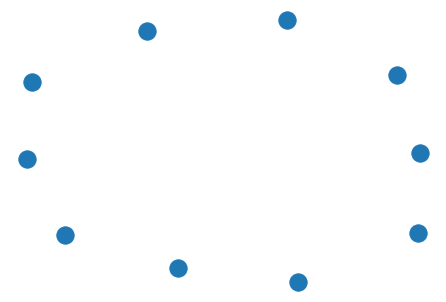

In [34]:
GER = nx.erdos_renyi_graph(10, 0)
nx.draw( GER )

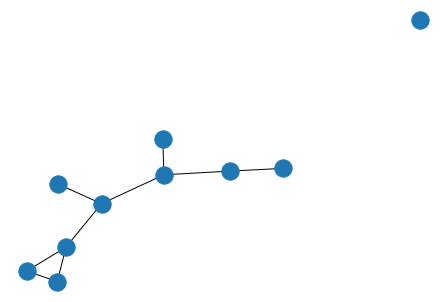

In [39]:
GER = nx.erdos_renyi_graph(10, 0.25)
nx.draw( GER )

Otro modelo es el basado en la conexión preferencial propuesto de Albert y Barabási.

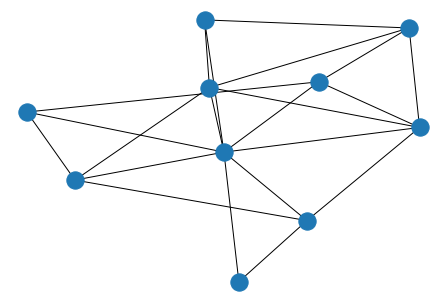

In [41]:
GAB = nx.barabasi_albert_graph(10, 3)
nx.draw( GAB )

## Análisis de Datos desde Twitter

Primero recolección de datos: Usar TAGS (https://tags.hawksey.info)


---


Segundo preprocesar los datos para generar redes

```

 #MúsicaDesdeCaleta les trae el junte más esperado por 30 años! @rico5uave y
 @el_audiman cantándoles a dúo este clásico de los 90’s VEN MICHU MICHU y 
 #QUEDATEENCASA #YoMeQuedoEnCasa https://t.co/CtUXpBKN1b

```

(DANIELPAEZMusic)




In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("http://j4loxa.com/files/laclo2020/graph_hashtags.csv")

In [46]:
GraphType = nx.Graph()

In [47]:
ght = nx.from_pandas_edgelist( df, create_using=GraphType)

In [49]:
print(nx.info( ght ))

Name: 
Type: Graph
Number of nodes: 144
Number of edges: 173
Average degree:   2.4028


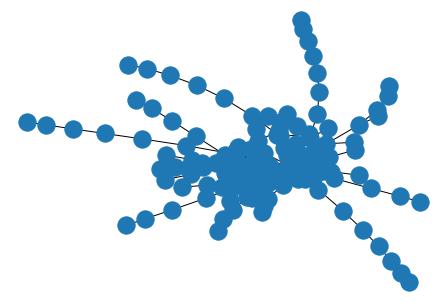

In [50]:
nx.draw(ght)

## Hubs
un centro alrededor del cual otras cosas giran o desde donde irradian; un foco de actividad, autoridad, comercio, transporte, etc.

La importancia de un nodo o enlace se calcula utilizando las medidas de centralidad.

### Degree

In [54]:
highest_degree_node = max( ght.nodes, key=ght.degree )

In [55]:
print(highest_degree_node)

MusicaDesdeCaleta*


In [56]:
ght.degree(highest_degree_node)

49

### Closeness (Cercanía)

¿Cuál es el nodo que está más cerca a todos los demás?

In [58]:
closeness = nx.centrality.closeness_centrality(ght)

In [59]:
highest_closeness_node = max( ght.nodes, key = closeness.get )
print(highest_closeness_node)

MusicaDesdeCaleta*


In [60]:
closeness[highest_closeness_node]

0.41210374639769454

### Betweenness (Intermediación)

¿Cuál es el nodo puente? (cual es nodo por el cual me veo obligado pasar para llegar a otros)

In [61]:
betweenness = nx.centrality.betweenness_centrality( ght )

In [62]:
highest_betweenness_node = max ( ght.nodes, key = betweenness.get )
print(highest_betweenness_node)

MusicaDesdeCaleta*


### Distribución de la centralidad
Es mucho mejor resumir la información acerca de la centralidad de todos los nodos. Por ejemplo, adicionalmente al nodo como máximo degree o cercanía o intermediación.

Para resumir la información se debe obtener una secuencia de todos los valores de centralidad

In [66]:
degree_sequence = [ght.degree(n) for n in ght.nodes]

In [64]:
import statistics

In [67]:
print( "Grado medio: ", statistics.mean( degree_sequence ) )
print( "Mediana del grado", statistics.median( degree_sequence ) )

Grado medio:  2.4027777777777777
Mediana del grado 2.0


En caso de cercanía e intermediación

In [68]:
betweenness_sequence = list( betweenness.values() )
print( "Intermediación medio: ", statistics.mean( betweenness_sequence ) )
print( "Mediana de la intermediación", statistics.median( betweenness_sequence ) )

Intermediación medio:  0.025182075358131696
Mediana de la intermediación 0.004268032437046522


### Graficar las distribuciones

Se puede utilizar histogramas, que muestra el valor del grado en el eje *x* y el número de nodos que tienen ese grado en el eje *y*.

Para hacer este conteo, usaremos la clase counter de collections, que se importa así:

In [70]:
from collections import Counter

In [71]:
degree_counts = Counter(degree_sequence)
degree_counts

Counter({1: 48, 2: 79, 3: 8, 4: 4, 5: 1, 9: 1, 12: 1, 25: 1, 49: 1})

El objeto devuelto, *degree_counts* en donde está el elemento contado y la veces que apareció en la secuencia.

En el histograma básico que elaboramos, queremos que el valor x para cada número entero entre el grado mínimo y máximo en la secuencia, incluidos.

Entonces se genera una lista con todos los valores que están en el rango.

In [72]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))

Los valores para el eje y, corresponden al número de nodos que tienen el valor del eje x. 
Entonces se genera una lista, con los valores que están en la secuencia y que corresponden a los valores de x, sino existe ese valor se asigna 0.

In [73]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

Para realizar el gráfico, se usará Matplotlib, concretamente el módulo pyplot. Necesitamos hacer el siguiente import.

In [74]:
import matplotlib.pyplot as plt

Ejecutar la siguiente sentencia, usando las listas que se obtuvieron anteriormente.

<BarContainer object of 49 artists>

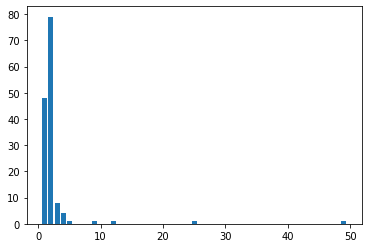

In [75]:
plt.bar(plot_x, plot_y)

Cuando hay demasiados valores en X de lo que se puede mostrar adecuadamente o cuando la medida que se usa es no discreta, como es el caso de la intermediación, es posible usar *binning* del histograma, que es dividir un eje en rangos o binning

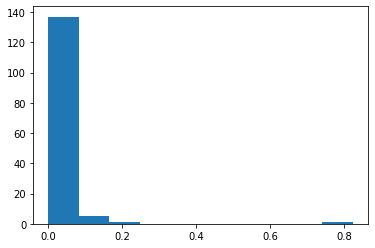

In [78]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)